# Keras classifcation notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:/Users/Admin/Downloads/TensorFlow_FILES/TensorFlow_FILES/DATA/cancer_classification.csv')

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

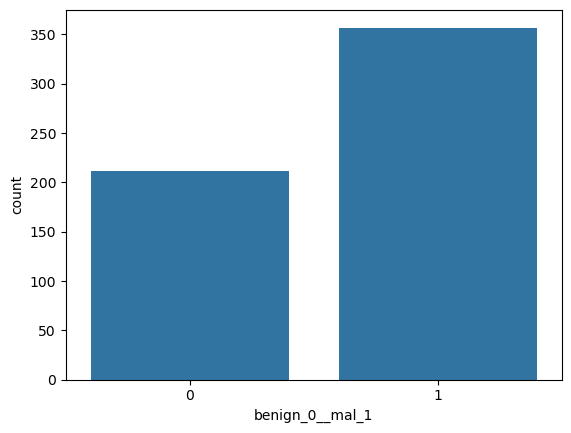

In [10]:
sns.countplot(x = 'benign_0__mal_1', data = df)

In [22]:
df.corr(numeric_only = True)['benign_0__mal_1'].sort_values(ascending = False)

benign_0__mal_1            1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

<Axes: >

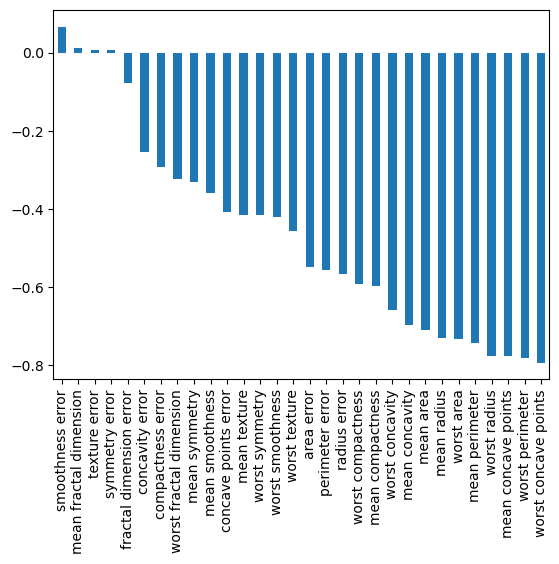

In [32]:
df.corr(numeric_only = True)['benign_0__mal_1'].sort_values(ascending = False)[1:].plot(kind = 'bar')

In [34]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()

In [44]:
X_train = scaler.fit_transform(X_train)

In [46]:
X_test = scaler.fit_transform(X_test)

# Dealing with overfiting and evaluation Lecture

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [53]:
X_train.shape

(426, 30)

In [55]:
#30 features

In [57]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

#Last Layer
#activation is sigmoid because it is binary question
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [63]:
model.fit(x = X_train, y = y_train,
          epochs = 600, validation_data = (X_test, y_test))

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.7037 - val_loss: 0.6802
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6656 - val_loss: 0.6443
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6332 - val_loss: 0.6098
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6053 - val_loss: 0.5685
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5570 - val_loss: 0.5159
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5107 - val_loss: 0.4678
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4791 - val_loss: 0.4222
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4245 - val_loss: 0.3774
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3855 - val_loss: 0.3421
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3556 - val_loss: 0.3088
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3199 - val_loss: 0.2803
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [65]:
losses = pd.DataFrame(model.history.history)

In [67]:
losses.head()

,loss,val_loss
0,0.698549,0.680164
1,0.661281,0.644262
2,0.627521,0.609800
3,0.593271,0.568525
4,0.554838,0.515919


<Axes: >

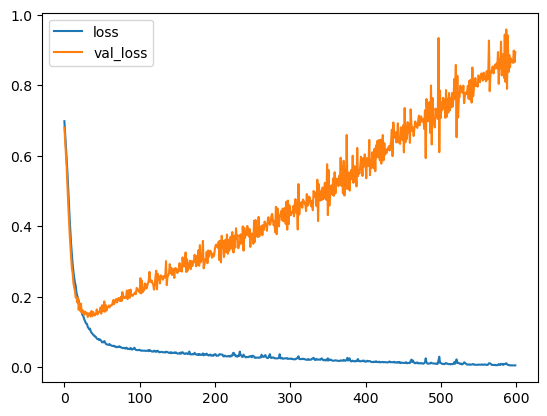

In [71]:
#Clear Example of ovefitting
# Val loss is super high
losses.plot()

## Create Call Backs

In [74]:
from tensorflow.keras.callbacks import EarlyStopping

In [76]:
early_stop = EarlyStopping(monitor = 'val_loss',
                           mode = 'min',
                           verbose = 1,
                           patience = 25) 

In [78]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

#Last Layer
#activation is sigmoid because it is binary question
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [80]:
model.fit(x = X_train, y = y_train,
          epochs = 600, validation_data = (X_test, y_test),
          callbacks = [early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6801 - val_loss: 0.6668
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6450 - val_loss: 0.6286
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6033 - val_loss: 0.5836
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5657 - val_loss: 0.5307
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5114 - val_loss: 0.4776
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4500 - val_loss: 0.4174
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4159 - val_loss: 0.3692
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3730 - val_loss: 0.3251
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3287 - val_loss: 0.2900
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2886 - val_loss: 0.2612
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2596 - val_loss: 0.2364
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

<Axes: >

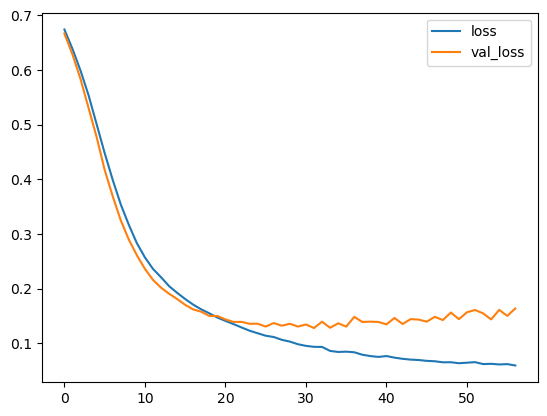

In [82]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Add dropout

In [85]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))

#Last Layer
#activation is sigmoid because it is binary question
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [87]:
model.fit(x = X_train, y = y_train,
          epochs = 600, validation_data = (X_test, y_test),
          callbacks = [early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.7804 - val_loss: 0.6985
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7163 - val_loss: 0.6747
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7024 - val_loss: 0.6522
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6717 - val_loss: 0.6347
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6709 - val_loss: 0.6196
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6532 - val_loss: 0.6039
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6177 - val_loss: 0.5828
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6327 - val_loss: 0.5622
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5993 - val_loss: 0.5367
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5872 - val_loss: 0.5185
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5803 - val_loss: 0.5006
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

<Axes: >

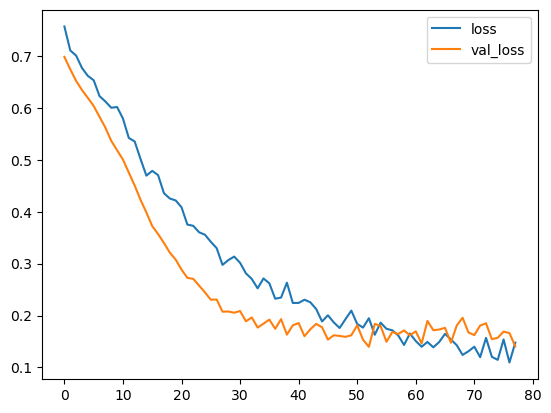

In [89]:
model_loss_dropout = pd.DataFrame(model.history.history)
model_loss_dropout.plot()

In [103]:
predictions = np.argmax(model.predict(X_test), axis = 1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
